In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

In [3]:
print(type(xtrain),type(ytest),type(xtest),type(ytrain))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (50000, 32, 32, 3)
ytrain shape: (50000, 1)
xtest shape: (10000, 32, 32, 3)
ytest shape: (10000, 1)


In [5]:
index = 0
xtrain[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

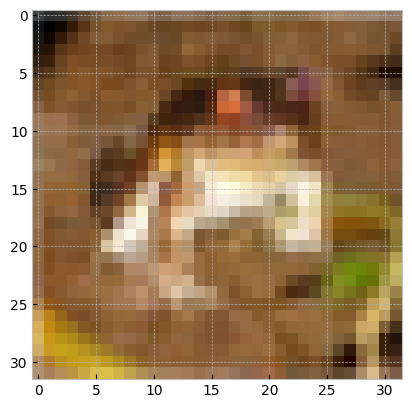

In [6]:
image = plt.imshow(xtrain[index])

In [7]:
print('label:',ytrain[index])

label: [6]


In [8]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('The image class:',classification[ytrain[index][0]])

The image class: frog


In [9]:
ytrain_conv = to_categorical(ytrain)
ytest_conv = to_categorical(ytest)

In [10]:
print(ytrain_conv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
print('The label for ytrain_conv is:',ytrain_conv[index])

The label for ytrain_conv is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
xtrain = xtrain / 255
xtest = xtest / 255

In [13]:
print('xtrain Normalized : ',xtrain[index])

xtrain Normalized :  [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.

In [14]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1500, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(750, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
hist = model.fit(xtrain,ytrain_conv, batch_size = 64 , epochs = 10, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 56s 87ms/step - loss: 1.7478 - accuracy: 0.3496 - val_loss: 1.5268 - val_accuracy: 0.4471
Epoch 2/10
625/625 [==============================] - 49s 79ms/step - loss: 1.4527 - accuracy: 0.4682 - val_loss: 1.3348 - val_accuracy: 0.5232
Epoch 3/10
625/625 [==============================] - 47s 75ms/step - loss: 1.3186 - accuracy: 0.5237 - val_loss: 1.2477 - val_accuracy: 0.5509
Epoch 4/10
625/625 [==============================] - 46s 74ms/step - loss: 1.2165 - accuracy: 0.5630 - val_loss: 1.1627 - val_accuracy: 0.5893
Epoch 5/10
625/625 [==============================] - 47s 75ms/step - loss: 1.1321 - accuracy: 0.5968 - val_loss: 1.0972 - val_accuracy: 0.6136
Epoch 6/10
625/625 [==============================] - 46s 74ms/step - loss: 1.0695 - accuracy: 0.6237 - val_loss: 1.0505 - val_accuracy: 0.6352
Epoch 7/10
625/625 [==============================] - 46s 74ms/step - loss: 1.0069 - accuracy: 0.6441 - val_loss: 1.0743 - val_accuracy:

In [17]:
model.evaluate(xtest,ytest_conv)[1]

313/313 [==============================] - 2s 7ms/step - loss: 0.9672 - accuracy: 0.6623


0.6622999906539917

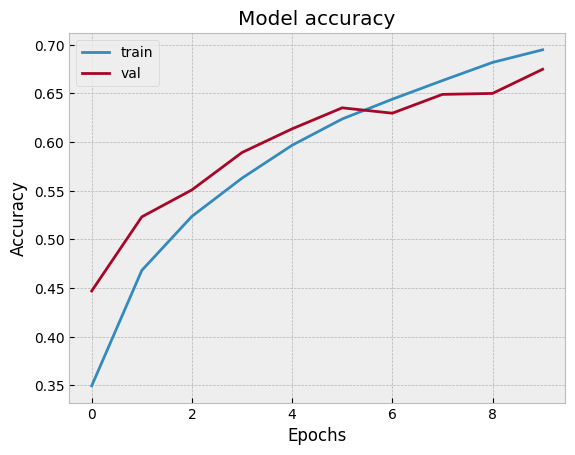

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc = 'upper left')
plt.show()

In [19]:
import numpy
cvscores = []
scores = model.evaluate([xtest], [ytest_conv], verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 66.23%
66.23% (+/- 0.00%)


In [20]:
hist = model.fit(xtrain,ytrain_conv, batch_size = 32 , epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 73s 58ms/step - loss: 0.9636 - accuracy: 0.6622 - val_loss: 1.0816 - val_accuracy: 0.6210
Epoch 2/10
1250/1250 [==============================] - 72s 58ms/step - loss: 0.8953 - accuracy: 0.6847 - val_loss: 0.9890 - val_accuracy: 0.6556
Epoch 3/10
1250/1250 [==============================] - 73s 58ms/step - loss: 0.8376 - accuracy: 0.7059 - val_loss: 1.0300 - val_accuracy: 0.6420
Epoch 4/10
1250/1250 [==============================] - 73s 58ms/step - loss: 0.8064 - accuracy: 0.7158 - val_loss: 0.9645 - val_accuracy: 0.6719
Epoch 5/10
1250/1250 [==============================] - 73s 58ms/step - loss: 0.7715 - accuracy: 0.7265 - val_loss: 0.9751 - val_accuracy: 0.6697
Epoch 6/10
1250/1250 [==============================] - 72s 58ms/step - loss: 0.7350 - accuracy: 0.7407 - val_loss: 0.9987 - val_accuracy: 0.6723
Epoch 7/10
1250/1250 [==============================] - 72s 58ms/step - loss: 0.7078 - accuracy: 0.7509 - val_loss: 0.9627 -

In [21]:
model.evaluate(xtest,ytest_conv)[1]

313/313 [==============================] - 2s 7ms/step - loss: 1.0114 - accuracy: 0.6601


0.660099983215332

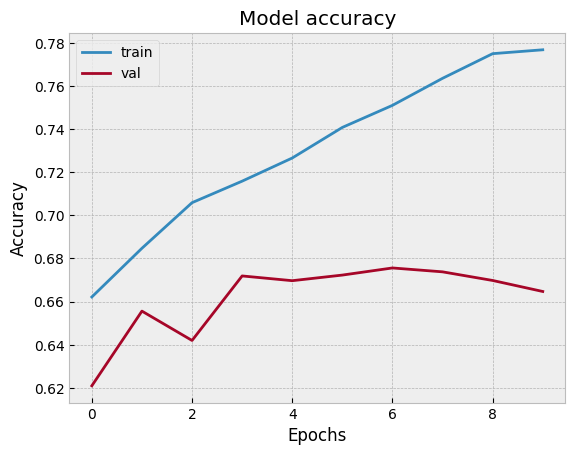

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc = 'upper left')
plt.show()

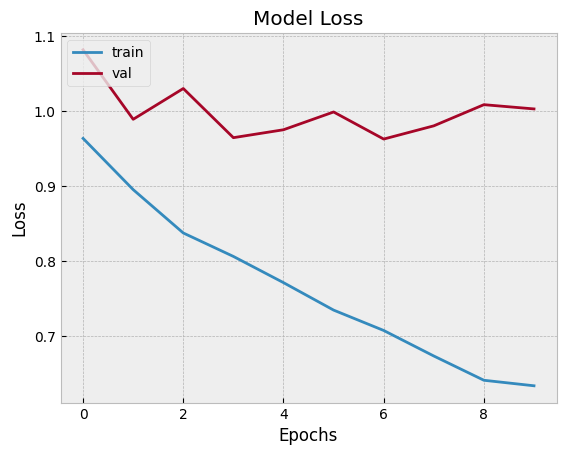

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'],loc = 'upper left')
plt.show()

In [24]:

cvscores = []
scores = model.evaluate([xtest], [ytest_conv], verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 66.01%
66.01% (+/- 0.00%)


In [25]:
from IPython import display
image = display.Image("C:/swan.jpg")

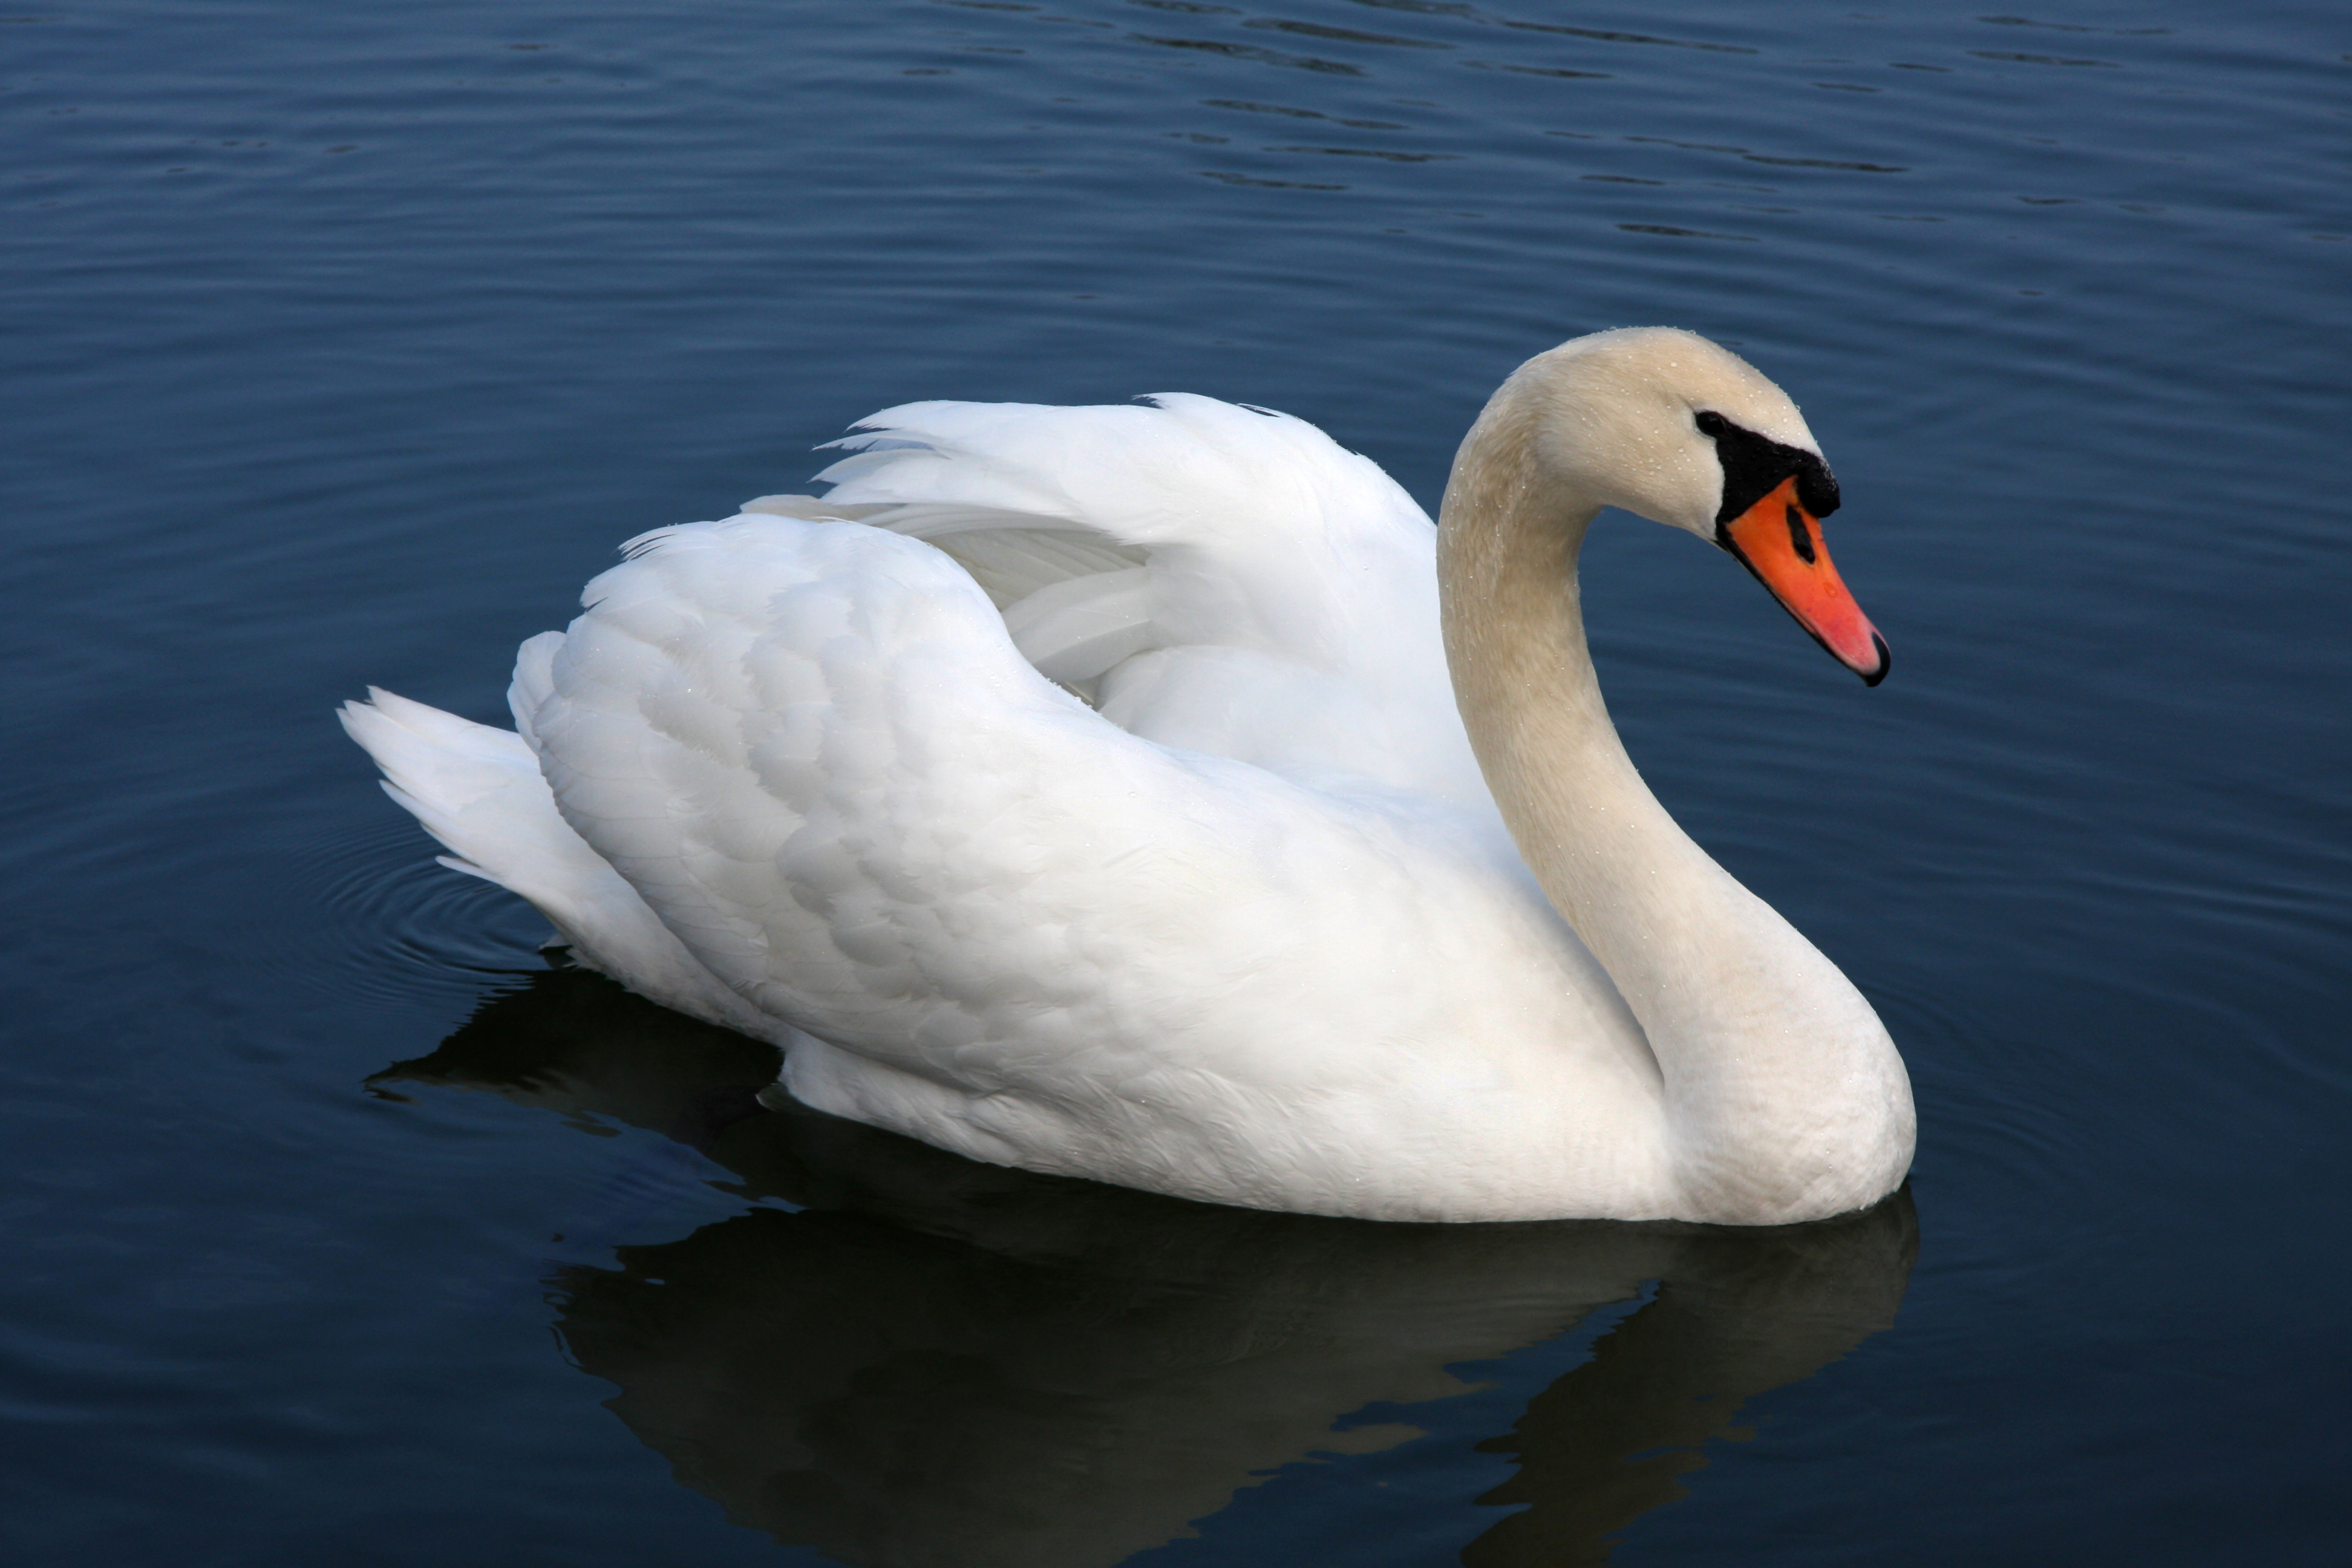

In [26]:
image

Above image from: https://en.wikipedia.org/wiki/Mute_swan#/media/File:Mute_swan_Vrhnika.jpg

In [27]:
newimage = plt.imread('C:/swan.jpg')

In [28]:
newimage

array([[[ 60,  78, 114],
        [ 59,  79, 114],
        [ 56,  80, 114],
        ...,
        [ 45,  76, 104],
        [ 47,  78, 106],
        [ 47,  78, 107]],

       [[ 59,  79, 114],
        [ 57,  80, 114],
        [ 55,  79, 113],
        ...,
        [ 49,  76, 105],
        [ 49,  79, 107],
        [ 49,  79, 107]],

       [[ 56,  78, 115],
        [ 56,  78, 115],
        [ 55,  79, 115],
        ...,
        [ 51,  78, 107],
        [ 50,  80, 108],
        [ 49,  79, 107]],

       ...,

       [[ 19,  31,  47],
        [ 20,  32,  48],
        [ 19,  32,  49],
        ...,
        [ 20,  30,  40],
        [ 21,  31,  41],
        [ 20,  32,  44]],

       [[ 18,  32,  45],
        [ 19,  32,  48],
        [ 18,  31,  47],
        ...,
        [ 19,  29,  41],
        [ 17,  29,  41],
        [ 18,  30,  42]],

       [[ 18,  32,  45],
        [ 18,  32,  45],
        [ 17,  30,  46],
        ...,
        [ 17,  29,  41],
        [ 17,  29,  43],
        [ 17,  29,  43]]

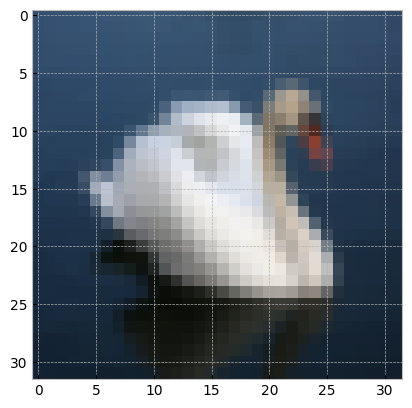

In [29]:
from skimage.transform import resize
new_img = resize(newimage,(32,32,3))
img = plt.imshow(new_img)

In [30]:
Predict = model.predict(np.array([new_img]))
Predict

1/1 [==============================] - 0s 107ms/step


array([[0.0430402 , 0.00232412, 0.05504914, 0.12815453, 0.0016692 ,
        0.07470939, 0.00449873, 0.02935121, 0.618803  , 0.04240045]],
      dtype=float32)

In [31]:
index_list = [0,1,2,3,4,5,6,7,8,9]
x = Predict
for i in range(10):
    for j in range(10):
        if x[0][index_list[i]] > x[0][index_list[j]]:
            tmp = index_list[i]
            
index_list[i] = index_list[j]
index_list[j] = tmp
print(index_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [32]:
for i in range(10):
    print(classification[index_list[i]],':', round(Predict[0][index_list[i]] * 100,2),'%')

airplane : 4.3 %
automobile : 0.23 %
bird : 5.5 %
cat : 12.82 %
deer : 0.17 %
dog : 7.47 %
frog : 0.45 %
horse : 2.94 %
ship : 61.88 %
truck : 4.24 %


In [33]:
from IPython import display
image = display.Image('C:/dog.jpg')

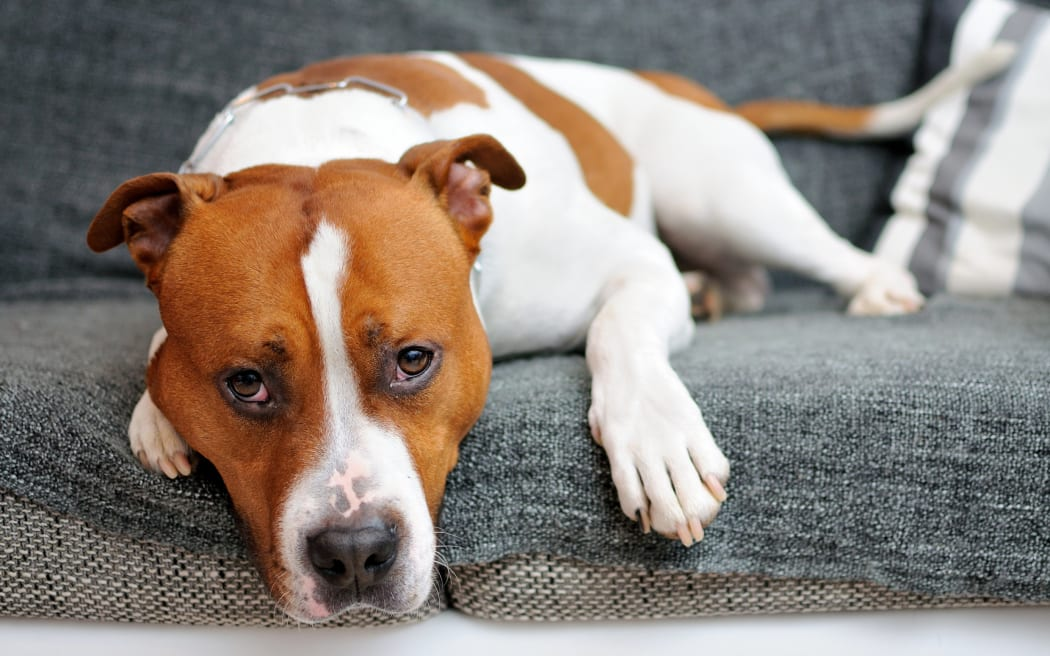

In [34]:
image

Above Image from : https://www.rnz.co.nz/news/national/467395/dog-owners-warned-kennel-cough-is-spreading-around-nz

In [35]:
newimage = plt.imread('C:/dog.jpg')
newimage

array([[[ 60,  67,  73],
        [ 55,  62,  68],
        [ 54,  61,  67],
        ...,
        [ 56,  63,  71],
        [ 51,  58,  66],
        [ 51,  58,  66]],

       [[ 59,  66,  72],
        [ 56,  63,  69],
        [ 54,  61,  67],
        ...,
        [ 59,  66,  74],
        [ 53,  60,  68],
        [ 53,  60,  68]],

       [[ 59,  66,  72],
        [ 56,  63,  69],
        [ 55,  62,  68],
        ...,
        [ 63,  72,  77],
        [ 57,  66,  71],
        [ 57,  66,  71]],

       ...,

       [[214, 215, 220],
        [214, 215, 220],
        [214, 215, 220],
        ...,
        [210, 214, 223],
        [208, 212, 221],
        [208, 212, 221]],

       [[214, 215, 220],
        [214, 215, 220],
        [214, 215, 220],
        ...,
        [211, 215, 224],
        [209, 213, 222],
        [209, 213, 222]],

       [[214, 215, 220],
        [214, 215, 220],
        [214, 215, 220],
        ...,
        [211, 215, 224],
        [210, 214, 223],
        [210, 214, 223]]

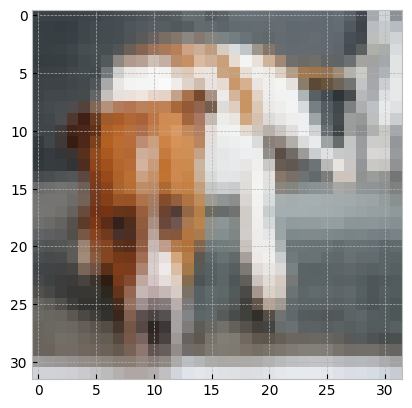

In [36]:
new_img = resize(newimage,(32,32,3))
img = plt.imshow(new_img)

In [37]:
Predict = model.predict(np.array([new_img]))
Predict

1/1 [==============================] - 0s 19ms/step


array([[5.7448575e-04, 1.9565884e-06, 2.2901066e-03, 3.7577394e-02,
        5.7760696e-04, 9.2409581e-01, 7.5745966e-06, 3.3556804e-02,
        4.7024583e-05, 1.2711820e-03]], dtype=float32)

In [38]:
for i in range(10):
    print(classification[index_list[i]],':', round(Predict[0][index_list[i]] * 100,2),'%')

airplane : 0.06 %
automobile : 0.0 %
bird : 0.23 %
cat : 3.76 %
deer : 0.06 %
dog : 92.41 %
frog : 0.0 %
horse : 3.36 %
ship : 0.0 %
truck : 0.13 %


In [39]:
from IPython import display
image = display.Image('C:/horse.jpg')

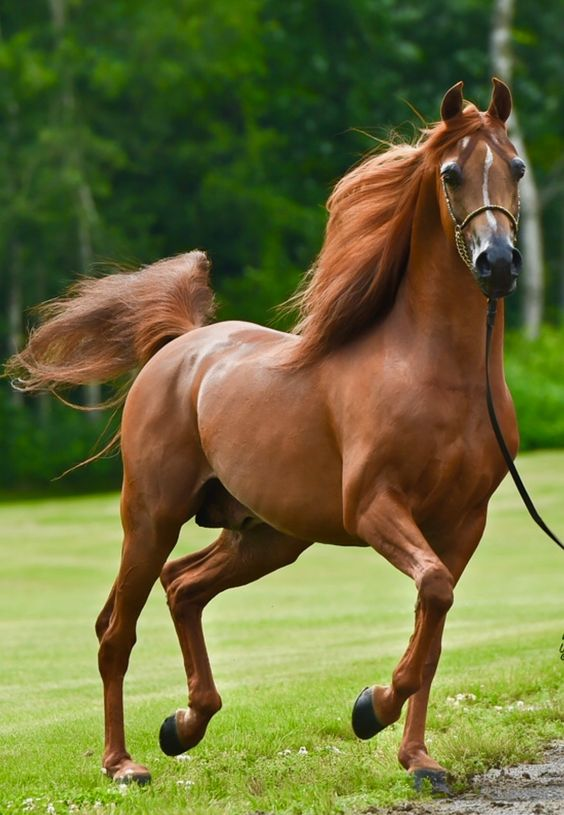

In [40]:
image

Above image from : https://www.pinterest.nz/pin/3377768463872128/

In [41]:
newimage = plt.imread('C:/horse.jpg')
newimage

array([[[ 24,  50,  25],
        [ 25,  51,  26],
        [ 24,  53,  25],
        ...,
        [ 40,  80,  27],
        [ 40,  80,  27],
        [ 41,  81,  28]],

       [[ 24,  50,  25],
        [ 24,  50,  23],
        [ 24,  53,  25],
        ...,
        [ 39,  79,  26],
        [ 40,  80,  27],
        [ 41,  81,  28]],

       [[ 23,  49,  22],
        [ 24,  50,  23],
        [ 23,  52,  24],
        ...,
        [ 40,  78,  27],
        [ 41,  79,  28],
        [ 42,  80,  29]],

       ...,

       [[101, 149,   5],
        [120, 168,  22],
        [135, 180,  35],
        ...,
        [184, 180, 168],
        [188, 184, 172],
        [187, 183, 171]],

       [[ 78, 126,   0],
        [ 83, 131,   0],
        [115, 162,  24],
        ...,
        [179, 175, 163],
        [191, 187, 175],
        [194, 190, 178]],

       [[ 65, 113,   0],
        [ 69, 115,   0],
        [113, 160,  30],
        ...,
        [194, 190, 178],
        [203, 199, 187],
        [203, 199, 187]]

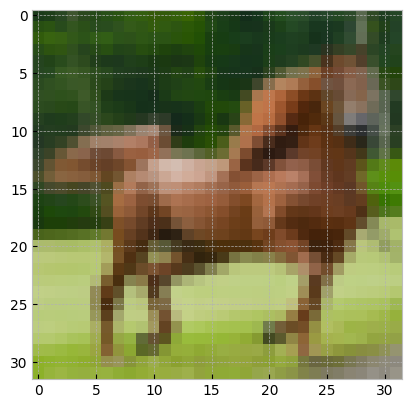

In [42]:
new_img = resize(newimage,(32,32,3))
img = plt.imshow(new_img)

In [43]:
Predict = model.predict(np.array([new_img]))
Predict

1/1 [==============================] - 0s 21ms/step


array([[4.8910440e-09, 3.5503661e-10, 5.0878334e-08, 2.2913327e-09,
        2.2959352e-05, 7.1120548e-06, 5.7310063e-09, 9.9996984e-01,
        1.2276918e-11, 2.9127787e-11]], dtype=float32)

In [44]:
for i in range(10):
    print(classification[index_list[i]],':', round(Predict[0][index_list[i]] * 100,2),'%')

airplane : 0.0 %
automobile : 0.0 %
bird : 0.0 %
cat : 0.0 %
deer : 0.0 %
dog : 0.0 %
frog : 0.0 %
horse : 100.0 %
ship : 0.0 %
truck : 0.0 %
